## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9939992	total: 58.8ms	remaining: 58.8s
1:	learn: 0.9741094	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9521614	total: 61ms	remaining: 20.3s
3:	learn: 0.9369257	total: 62.1ms	remaining: 15.5s
4:	learn: 0.9214178	total: 63.1ms	remaining: 12.6s
5:	learn: 0.9054019	total: 64ms	remaining: 10.6s
6:	learn: 0.8893720	total: 65ms	remaining: 9.22s
7:	learn: 0.8726348	total: 65.9ms	remaining: 8.17s
8:	learn: 0.8572877	total: 66.7ms	remaining: 7.35s
9:	learn: 0.8397571	total: 67.7ms	remaining: 6.7s
10:	learn: 0.8241981	total: 68.6ms	remaining: 6.17s
11:	learn: 0.8097734	total: 69.6ms	remaining: 5.73s
12:	learn: 0.7947201	total: 70.4ms	remaining: 5.35s
13:	learn: 0.7795680	total: 71.3ms	remaining: 5.02s
14:	learn: 0.7673140	total: 72.3ms	remaining: 4.74s
15:	learn: 0.7522230	total: 73.1ms	remaining: 4.5s
16:	learn: 0.7399567	total: 73.9ms	remaining: 4.28s
17:	learn: 0.7286468	total: 74.8ms	remaining: 4.08s
18:	learn: 0.7160015	total: 75.7ms	remaining: 3.91s


60:	learn: 0.4153545	total: 108ms	remaining: 1.67s
61:	learn: 0.4108996	total: 109ms	remaining: 1.65s
62:	learn: 0.4063011	total: 110ms	remaining: 1.63s
63:	learn: 0.4020311	total: 111ms	remaining: 1.62s
64:	learn: 0.3984891	total: 111ms	remaining: 1.6s
65:	learn: 0.3950012	total: 112ms	remaining: 1.59s
66:	learn: 0.3908411	total: 113ms	remaining: 1.57s
67:	learn: 0.3867940	total: 114ms	remaining: 1.56s
68:	learn: 0.3838238	total: 115ms	remaining: 1.55s
69:	learn: 0.3807755	total: 116ms	remaining: 1.53s
70:	learn: 0.3776245	total: 116ms	remaining: 1.52s
71:	learn: 0.3753710	total: 117ms	remaining: 1.51s
72:	learn: 0.3728082	total: 118ms	remaining: 1.5s
73:	learn: 0.3693616	total: 119ms	remaining: 1.49s
74:	learn: 0.3661445	total: 119ms	remaining: 1.47s
75:	learn: 0.3631343	total: 120ms	remaining: 1.46s
76:	learn: 0.3604755	total: 121ms	remaining: 1.45s
77:	learn: 0.3574494	total: 122ms	remaining: 1.44s
78:	learn: 0.3555824	total: 123ms	remaining: 1.43s
79:	learn: 0.3530665	total: 123ms

160:	learn: 0.2442075	total: 192ms	remaining: 1s
161:	learn: 0.2434235	total: 193ms	remaining: 998ms
162:	learn: 0.2428165	total: 194ms	remaining: 995ms
163:	learn: 0.2421487	total: 195ms	remaining: 993ms
164:	learn: 0.2416921	total: 196ms	remaining: 990ms
165:	learn: 0.2409778	total: 196ms	remaining: 987ms
166:	learn: 0.2403276	total: 197ms	remaining: 984ms
167:	learn: 0.2393839	total: 198ms	remaining: 981ms
168:	learn: 0.2387166	total: 199ms	remaining: 979ms
169:	learn: 0.2381217	total: 200ms	remaining: 976ms
170:	learn: 0.2375342	total: 201ms	remaining: 973ms
171:	learn: 0.2372587	total: 201ms	remaining: 967ms
172:	learn: 0.2365720	total: 202ms	remaining: 964ms
173:	learn: 0.2354168	total: 203ms	remaining: 962ms
174:	learn: 0.2348845	total: 203ms	remaining: 959ms
175:	learn: 0.2338745	total: 204ms	remaining: 956ms
176:	learn: 0.2336372	total: 205ms	remaining: 953ms
177:	learn: 0.2332229	total: 206ms	remaining: 950ms
178:	learn: 0.2326955	total: 207ms	remaining: 948ms
179:	learn: 0.2

289:	learn: 0.1762331	total: 299ms	remaining: 732ms
290:	learn: 0.1757643	total: 300ms	remaining: 730ms
291:	learn: 0.1753951	total: 301ms	remaining: 730ms
292:	learn: 0.1751339	total: 302ms	remaining: 728ms
293:	learn: 0.1746944	total: 303ms	remaining: 727ms
294:	learn: 0.1743585	total: 303ms	remaining: 725ms
295:	learn: 0.1741647	total: 304ms	remaining: 724ms
296:	learn: 0.1739725	total: 305ms	remaining: 723ms
297:	learn: 0.1733485	total: 306ms	remaining: 721ms
298:	learn: 0.1728106	total: 307ms	remaining: 720ms
299:	learn: 0.1724232	total: 308ms	remaining: 719ms
300:	learn: 0.1721841	total: 309ms	remaining: 717ms
301:	learn: 0.1716510	total: 310ms	remaining: 716ms
302:	learn: 0.1714233	total: 311ms	remaining: 715ms
303:	learn: 0.1712307	total: 312ms	remaining: 713ms
304:	learn: 0.1707266	total: 312ms	remaining: 712ms
305:	learn: 0.1702934	total: 314ms	remaining: 712ms
306:	learn: 0.1699971	total: 315ms	remaining: 711ms
307:	learn: 0.1696102	total: 316ms	remaining: 709ms
308:	learn: 

383:	learn: 0.1451878	total: 383ms	remaining: 614ms
384:	learn: 0.1447619	total: 383ms	remaining: 613ms
385:	learn: 0.1445492	total: 384ms	remaining: 611ms
386:	learn: 0.1441847	total: 385ms	remaining: 610ms
387:	learn: 0.1441533	total: 386ms	remaining: 609ms
388:	learn: 0.1437822	total: 387ms	remaining: 608ms
389:	learn: 0.1435005	total: 388ms	remaining: 607ms
390:	learn: 0.1431741	total: 389ms	remaining: 605ms
391:	learn: 0.1428676	total: 390ms	remaining: 604ms
392:	learn: 0.1426201	total: 390ms	remaining: 603ms
393:	learn: 0.1422038	total: 391ms	remaining: 602ms
394:	learn: 0.1419808	total: 392ms	remaining: 600ms
395:	learn: 0.1416373	total: 393ms	remaining: 600ms
396:	learn: 0.1415892	total: 394ms	remaining: 598ms
397:	learn: 0.1415646	total: 395ms	remaining: 597ms
398:	learn: 0.1413586	total: 395ms	remaining: 596ms
399:	learn: 0.1411922	total: 396ms	remaining: 594ms
400:	learn: 0.1409528	total: 397ms	remaining: 593ms
401:	learn: 0.1406487	total: 398ms	remaining: 592ms
402:	learn: 

512:	learn: 0.1178780	total: 490ms	remaining: 465ms
513:	learn: 0.1177255	total: 491ms	remaining: 464ms
514:	learn: 0.1175123	total: 492ms	remaining: 463ms
515:	learn: 0.1172635	total: 492ms	remaining: 462ms
516:	learn: 0.1169632	total: 493ms	remaining: 461ms
517:	learn: 0.1167715	total: 494ms	remaining: 460ms
518:	learn: 0.1166070	total: 495ms	remaining: 459ms
519:	learn: 0.1163285	total: 496ms	remaining: 458ms
520:	learn: 0.1160913	total: 497ms	remaining: 457ms
521:	learn: 0.1158925	total: 498ms	remaining: 456ms
522:	learn: 0.1156733	total: 498ms	remaining: 455ms
523:	learn: 0.1154211	total: 499ms	remaining: 453ms
524:	learn: 0.1151502	total: 500ms	remaining: 452ms
525:	learn: 0.1149264	total: 501ms	remaining: 452ms
526:	learn: 0.1147148	total: 502ms	remaining: 451ms
527:	learn: 0.1145465	total: 503ms	remaining: 450ms
528:	learn: 0.1143795	total: 504ms	remaining: 448ms
529:	learn: 0.1141602	total: 505ms	remaining: 447ms
530:	learn: 0.1139395	total: 505ms	remaining: 446ms
531:	learn: 

614:	learn: 0.0988058	total: 574ms	remaining: 359ms
615:	learn: 0.0985830	total: 574ms	remaining: 358ms
616:	learn: 0.0983622	total: 575ms	remaining: 357ms
617:	learn: 0.0981205	total: 576ms	remaining: 356ms
618:	learn: 0.0979133	total: 577ms	remaining: 355ms
619:	learn: 0.0977735	total: 577ms	remaining: 354ms
620:	learn: 0.0976534	total: 578ms	remaining: 353ms
621:	learn: 0.0975053	total: 579ms	remaining: 352ms
622:	learn: 0.0973077	total: 580ms	remaining: 351ms
623:	learn: 0.0971283	total: 581ms	remaining: 350ms
624:	learn: 0.0968401	total: 582ms	remaining: 349ms
625:	learn: 0.0967272	total: 583ms	remaining: 348ms
626:	learn: 0.0965073	total: 584ms	remaining: 347ms
627:	learn: 0.0963435	total: 585ms	remaining: 347ms
628:	learn: 0.0962123	total: 586ms	remaining: 346ms
629:	learn: 0.0960734	total: 587ms	remaining: 345ms
630:	learn: 0.0959530	total: 587ms	remaining: 344ms
631:	learn: 0.0957259	total: 588ms	remaining: 343ms
632:	learn: 0.0955298	total: 589ms	remaining: 342ms
633:	learn: 

742:	learn: 0.0792279	total: 680ms	remaining: 235ms
743:	learn: 0.0791802	total: 681ms	remaining: 234ms
744:	learn: 0.0790746	total: 682ms	remaining: 233ms
745:	learn: 0.0789008	total: 683ms	remaining: 232ms
746:	learn: 0.0787533	total: 683ms	remaining: 231ms
747:	learn: 0.0786673	total: 684ms	remaining: 231ms
748:	learn: 0.0785024	total: 685ms	remaining: 230ms
749:	learn: 0.0784568	total: 686ms	remaining: 229ms
750:	learn: 0.0783447	total: 687ms	remaining: 228ms
751:	learn: 0.0781391	total: 688ms	remaining: 227ms
752:	learn: 0.0779777	total: 689ms	remaining: 226ms
753:	learn: 0.0778945	total: 690ms	remaining: 225ms
754:	learn: 0.0777810	total: 690ms	remaining: 224ms
755:	learn: 0.0775820	total: 691ms	remaining: 223ms
756:	learn: 0.0773853	total: 692ms	remaining: 222ms
757:	learn: 0.0773345	total: 693ms	remaining: 221ms
758:	learn: 0.0772842	total: 694ms	remaining: 220ms
759:	learn: 0.0772193	total: 694ms	remaining: 219ms
760:	learn: 0.0770580	total: 695ms	remaining: 218ms
761:	learn: 

841:	learn: 0.0684468	total: 764ms	remaining: 143ms
842:	learn: 0.0683369	total: 765ms	remaining: 142ms
843:	learn: 0.0682265	total: 766ms	remaining: 142ms
844:	learn: 0.0681978	total: 766ms	remaining: 141ms
845:	learn: 0.0681116	total: 767ms	remaining: 140ms
846:	learn: 0.0679792	total: 768ms	remaining: 139ms
847:	learn: 0.0678861	total: 769ms	remaining: 138ms
848:	learn: 0.0677285	total: 770ms	remaining: 137ms
849:	learn: 0.0676895	total: 770ms	remaining: 136ms
850:	learn: 0.0675887	total: 771ms	remaining: 135ms
851:	learn: 0.0674756	total: 772ms	remaining: 134ms
852:	learn: 0.0673537	total: 773ms	remaining: 133ms
853:	learn: 0.0673259	total: 773ms	remaining: 132ms
854:	learn: 0.0672371	total: 774ms	remaining: 131ms
855:	learn: 0.0671934	total: 775ms	remaining: 130ms
856:	learn: 0.0671079	total: 776ms	remaining: 129ms
857:	learn: 0.0670995	total: 777ms	remaining: 129ms
858:	learn: 0.0670118	total: 778ms	remaining: 128ms
859:	learn: 0.0669239	total: 778ms	remaining: 127ms
860:	learn: 

971:	learn: 0.0564816	total: 870ms	remaining: 25.1ms
972:	learn: 0.0563950	total: 871ms	remaining: 24.2ms
973:	learn: 0.0563474	total: 872ms	remaining: 23.3ms
974:	learn: 0.0562813	total: 872ms	remaining: 22.4ms
975:	learn: 0.0562525	total: 873ms	remaining: 21.5ms
976:	learn: 0.0562190	total: 874ms	remaining: 20.6ms
977:	learn: 0.0561402	total: 875ms	remaining: 19.7ms
978:	learn: 0.0560508	total: 876ms	remaining: 18.8ms
979:	learn: 0.0559714	total: 876ms	remaining: 17.9ms
980:	learn: 0.0558442	total: 878ms	remaining: 17ms
981:	learn: 0.0557276	total: 879ms	remaining: 16.1ms
982:	learn: 0.0556898	total: 880ms	remaining: 15.2ms
983:	learn: 0.0555888	total: 880ms	remaining: 14.3ms
984:	learn: 0.0554922	total: 881ms	remaining: 13.4ms
985:	learn: 0.0553708	total: 882ms	remaining: 12.5ms
986:	learn: 0.0553535	total: 883ms	remaining: 11.6ms
987:	learn: 0.0553215	total: 884ms	remaining: 10.7ms
988:	learn: 0.0552765	total: 884ms	remaining: 9.84ms
989:	learn: 0.0552487	total: 885ms	remaining: 8.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

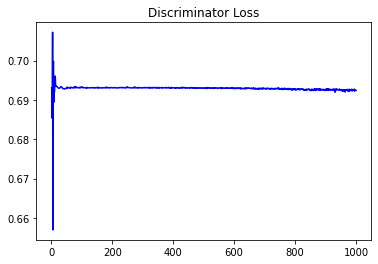

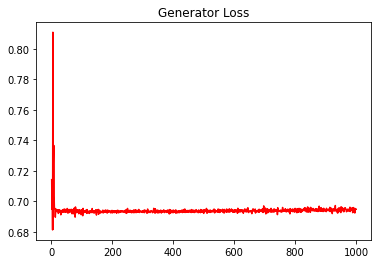

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14761704173665177


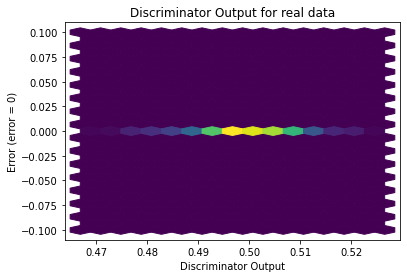

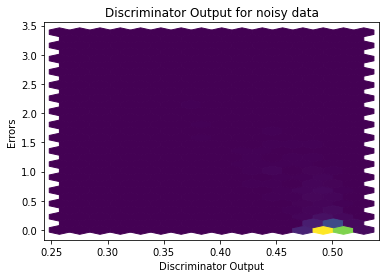

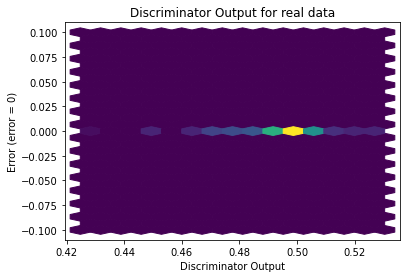

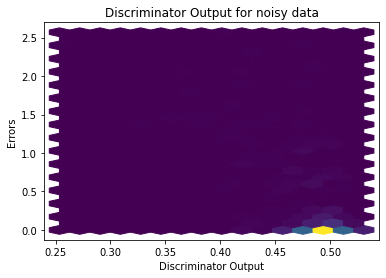

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


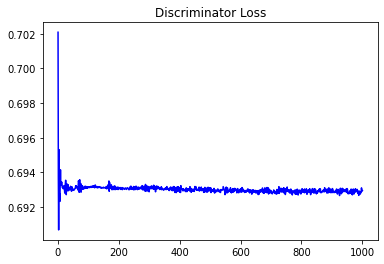

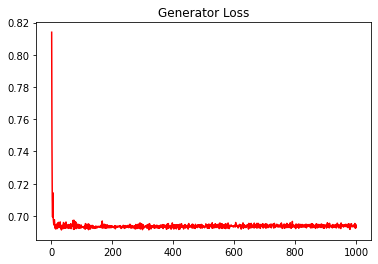

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14748460820134643


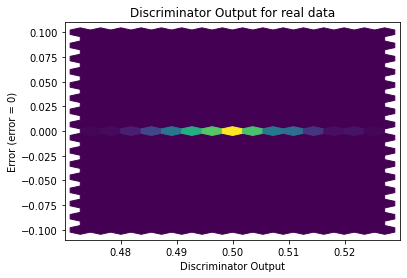

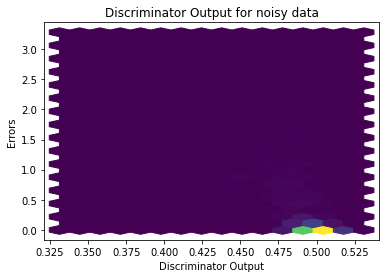

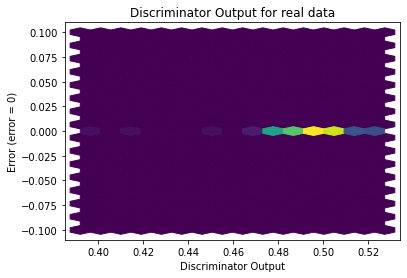

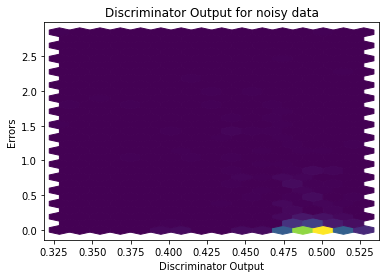

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3194]], requires_grad=True)
